## Домашнее задание №7

##### Автор: [Радослав Нейчев](https://www.linkedin.com/in/radoslav-neychev/), @neychev

In [1]:
import numpy as np

import torch
from torch import nn
from torch.nn import functional as F

import torchvision
from torchvision.datasets import MNIST

from matplotlib import pyplot as plt
from IPython.display import clear_output

### Задача №1: 
Обратимся к классической задаче распознавания рукописных цифр. Мы будем работать с набором данных [MNIST](http://yann.lecun.com/exdb/mnist/). В данном задании воспользуемся всем датасетом целиком.

__Ваша основная задача: реализовать весь пайплан обучения модели и добиться качества $\geq 92\%$ на тестовой выборке.__

Код для обучения модели в данном задании отсутствует. Присутствует лишь несколько тестов, которые помогут вам отладить свое решение. За примером можно обратиться к ноутбуку первого занятия.

Настоятельно рекомендуем написать код "с нуля", лишь поглядывая на готовые примеры, а не просто "скопировать-вставить". Это поможет вам в дальнейшем.

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting .\MNIST\raw\train-images-idx3-ubyte.gz to .\MNIST\raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting .\MNIST\raw\train-labels-idx1-ubyte.gz to .\MNIST\raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting .\MNIST\raw\t10k-images-idx3-ubyte.gz to .\MNIST\raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting .\MNIST\raw\t10k-labels-idx1-ubyte.gz to .\MNIST\raw



Text(0.5, 1.0, 'Image label: 6')

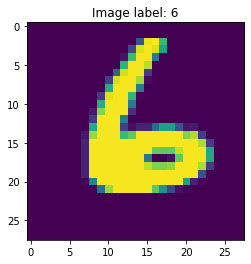

In [2]:
# do not change the code in the block below
# __________start of block__________

train_mnist_data = MNIST('.', train=True, transform=torchvision.transforms.ToTensor(), download=True)
test_mnist_data = MNIST('.', train=False, transform=torchvision.transforms.ToTensor(), download=True)


train_data_loader = torch.utils.data.DataLoader(
    train_mnist_data,
    batch_size=32,
    shuffle=True,
    num_workers=2
)

test_data_loader = torch.utils.data.DataLoader(
    test_mnist_data,
    batch_size=32,
    shuffle=False,
    num_workers=2
)

random_batch = next(iter(train_data_loader))
_image, _label = random_batch[0][0], random_batch[1][0]
plt.figure()
plt.imshow(_image.reshape(28, 28))
plt.title(f'Image label: {_label}')
# __________end of block__________

Постройте модель ниже. Пожалуйста, не стройте переусложненную сеть, не стоит делать ее глубже четырех слоев (можно и меньше). Ваша основная задача – обучить модель и получить качество на отложенной (тестовой выборке) не менее 92% accuracy.

*Комментарий: для этого достаточно линейных слоев и функций активации.*

__Внимание, ваша модель должна быть представлена именно переменной `model`.__

In [67]:
print(len(random_batch), len(random_batch[1]))
print(random_batch[1])

2 32
tensor([6, 1, 9, 5, 7, 6, 9, 6, 2, 3, 8, 2, 2, 3, 2, 7, 8, 7, 4, 1, 6, 5, 0, 0,
        2, 6, 4, 1, 0, 8, 2, 8])


In [48]:
_image.shape

torch.Size([1, 28, 28])

In [49]:
model = nn.Sequential(nn.Flatten(),
                      nn.Linear(784, 256),
                      nn.ReLU(),
                      nn.Linear(256, 128),
                      nn.ReLU(),
                      nn.Linear(128,10),
                      nn.LogSoftmax())

Локальные тесты для проверки вашей модели доступны ниже:

In [51]:
# do not change the code in the block below
# __________start of block__________
assert model is not None, 'Please, use `model` variable to store your model'

try:
    x = random_batch[0].reshape(-1, 784)
    y = random_batch[1]

    # compute outputs given inputs, both are variables
    y_predicted = model(x)    
except Exception as e:
    print('Something is wrong with the model')
    raise e
    
    
assert y_predicted.shape[-1] == 10, 'Model should predict 10 logits/probas'

print('Everything seems fine!')
# __________end of block__________

Everything seems fine!


In [58]:
y_predicted.shape

torch.Size([32, 10])

Настройте параметры модели на обучающей выборке. Рекомендуем поработать с различными оптимизаторами.

In [69]:
# your code here
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
model.train()
for batch_idx, (data, target) in enumerate(train_data_loader):
    print('step ', batch_idx)
    optimizer.zero_grad()
    output = model(data)
    print(output)
    print('target', target)
    loss = F.nll_loss(output, target)
    print('loss', loss)
    loss.backward()
    optimizer.step()


step  0
tensor([[-4.4372e+00, -2.5557e+00, -2.2791e+00, -4.4599e+00, -8.9674e+00,
         -3.8543e-01, -2.8293e+00, -1.0455e+01, -2.8620e+00, -9.6792e+00],
        [-8.7758e+00, -1.0410e+01, -8.7575e+00, -8.6118e+00, -7.3996e+00,
         -7.5064e+00, -1.2577e+01, -1.2531e-02, -7.7259e+00, -4.5733e+00],
        [-1.2173e+01, -5.4356e-03, -7.4713e+00, -6.6701e+00, -9.2059e+00,
         -7.6441e+00, -9.6361e+00, -8.5460e+00, -6.2325e+00, -7.1630e+00],
        [-1.0428e+01, -9.4771e+00, -8.2785e+00, -5.9785e+00, -7.5496e+00,
         -6.5650e+00, -1.4175e+01, -3.2203e+00, -4.4961e+00, -5.7549e-02],
        [-6.3680e+00, -9.8866e+00, -1.1278e-02, -7.0453e+00, -1.2531e+01,
         -8.1355e+00, -7.3584e+00, -1.1106e+01, -4.8849e+00, -9.5988e+00],
        [-9.9288e+00, -2.4543e-01, -3.1453e+00, -5.5365e+00, -5.6695e+00,
         -4.8630e+00, -8.6742e+00, -7.2934e+00, -1.8585e+00, -5.9270e+00],
        [-9.2244e+00, -2.9271e+00, -6.2490e+00, -5.0844e+00, -6.4770e+00,
         -3.5833e+00, -7

loss tensor(0.2022, grad_fn=<NllLossBackward0>)
step  12
tensor([[-7.3249e+00, -1.1093e+01, -1.6168e-02, -4.5204e+00, -1.6437e+01,
         -7.6541e+00, -1.1610e+01, -6.7869e+00, -5.8739e+00, -9.8029e+00],
        [-1.6843e+01, -1.7006e+01, -1.0133e+01, -1.7526e+01, -1.0439e+01,
         -1.3863e+01, -1.0609e-04, -2.4017e+01, -1.0239e+01, -1.5475e+01],
        [-1.8848e-02, -2.1046e+01, -6.6897e+00, -1.1811e+01, -1.5784e+01,
         -7.4627e+00, -4.0885e+00, -1.4479e+01, -9.5217e+00, -1.1718e+01],
        [-1.4043e+01, -1.1584e+01, -1.1515e+01, -9.5285e+00, -5.1372e+00,
         -9.7433e+00, -1.5611e+01, -2.7580e+00, -8.3545e+00, -7.2229e-02],
        [-1.0173e+01, -1.1538e+01, -8.3474e+00, -7.8161e+00, -8.5491e+00,
         -7.8665e+00, -1.4807e+01, -2.0307e-01, -7.3137e+00, -1.7046e+00],
        [-7.5202e+00, -8.8011e+00, -3.1980e-01, -6.8452e+00, -1.1113e+01,
         -6.5446e+00, -6.3374e+00, -4.6496e+00, -1.3827e+00, -4.7951e+00],
        [-1.3245e+01, -5.6993e-03, -7.5615e+00, -

target tensor([2, 9, 4, 6, 8, 6, 1, 3, 5, 2, 3, 1, 8, 3, 3, 4, 9, 2, 0, 2, 5, 7, 2, 8,
        1, 0, 8, 9, 3, 2, 5, 5])
loss tensor(0.5304, grad_fn=<NllLossBackward0>)
step  29
tensor([[-1.0367e+01, -8.2874e-03, -7.7562e+00, -7.1332e+00, -8.9498e+00,
         -7.1270e+00, -8.7311e+00, -8.1074e+00, -5.3126e+00, -7.3073e+00],
        [-7.2860e+00, -1.2197e+01, -5.1336e+00, -1.8589e+00, -1.2569e+01,
         -6.8831e+00, -1.6223e+01, -1.8536e-01, -7.5199e+00, -5.2607e+00],
        [-5.6840e+00, -1.0690e+01, -7.8326e+00, -8.8924e+00, -1.1915e+01,
         -2.4484e+00, -1.0719e+01, -1.1883e+01, -9.5232e-02, -7.7877e+00],
        [-5.7745e+00, -9.3624e+00, -6.0031e+00, -5.7028e-02, -1.0678e+01,
         -3.1111e+00, -1.0162e+01, -7.4548e+00, -5.4735e+00, -7.8772e+00],
        [-1.1650e+01, -9.8105e+00, -1.1489e+01, -8.9934e+00, -5.2242e-01,
         -4.1741e+00, -1.1697e+01, -7.2396e+00, -3.3020e+00, -1.0390e+00],
        [-7.8802e+00, -1.6027e+01, -8.1959e-04, -8.6601e+00, -1.3517e+01,
    

tensor([[-5.4692e+00, -1.6841e+01, -7.2200e+00, -1.3478e+01, -7.6886e+00,
         -9.9990e+00, -5.5695e-03, -1.3778e+01, -9.3950e+00, -1.0885e+01],
        [-1.3927e+01, -1.1149e+01, -8.5722e+00, -1.0605e+01, -1.2281e-02,
         -9.2530e+00, -7.6924e+00, -1.1158e+01, -8.1414e+00, -4.4991e+00],
        [-1.0363e+01, -4.6904e-02, -5.5697e+00, -4.8558e+00, -1.1772e+01,
         -7.8589e+00, -1.2793e+01, -3.8112e+00, -4.6756e+00, -6.0507e+00],
        [-1.4342e+01, -1.0623e+01, -1.0571e+01, -9.2012e+00, -7.2495e-03,
         -7.4266e+00, -8.6522e+00, -9.4733e+00, -8.5024e+00, -5.1124e+00],
        [-5.5110e+00, -9.3349e+00, -5.2549e-02, -3.5289e+00, -8.8253e+00,
         -6.5441e+00, -6.6046e+00, -7.7087e+00, -4.2545e+00, -8.9030e+00],
        [-8.3363e+00, -1.7722e+01, -8.1141e+00, -1.5374e+01, -1.1170e+01,
         -8.8862e+00, -7.7242e-04, -2.0716e+01, -9.4292e+00, -1.5442e+01],
        [-1.0841e+01, -1.0255e+01, -7.3050e+00, -1.0060e+01, -6.6043e-03,
         -7.2347e+00, -7.3303e+0

target tensor([0, 4, 3, 1, 4, 1, 1, 4, 0, 1, 0, 9, 9, 5, 9, 9, 2, 1, 2, 0, 0, 2, 2, 3,
        7, 2, 9, 6, 9, 7, 8, 9])
loss tensor(0.2062, grad_fn=<NllLossBackward0>)
step  66
tensor([[-1.5381e+01, -2.0246e+01, -1.3513e+01, -1.3053e+01, -1.7008e+01,
         -1.4777e+01, -2.5248e+01, -7.8198e-05, -1.3904e+01, -9.5236e+00],
        [-2.5348e-01, -1.2263e+01, -4.0185e+00, -2.5015e+00, -1.3240e+01,
         -2.6177e+00, -1.0246e+01, -6.3519e+00, -3.0266e+00, -7.2194e+00],
        [-7.2577e+00, -9.1624e+00, -8.2652e+00, -9.4835e-02, -1.0843e+01,
         -2.4744e+00, -1.0455e+01, -7.7359e+00, -5.5944e+00, -6.9179e+00],
        [-9.9044e+00, -1.3399e+01, -7.5164e+00, -1.0769e+01, -1.2064e+01,
         -4.8768e+00, -1.2905e+01, -1.2816e+01, -8.3200e-03, -1.0212e+01],
        [-1.5013e+01, -1.4869e+01, -1.3596e+01, -8.7724e+00, -5.8333e+00,
         -6.9695e+00, -1.6781e+01, -7.0466e+00, -6.6459e+00, -6.2143e-03],
        [-1.0023e+01, -1.4965e+01, -5.2631e+00, -1.3508e+01, -1.0594e+01,
    

tensor([[-1.0812e+01, -9.3991e+00, -7.6493e+00, -6.5804e+00, -1.8740e+00,
         -6.6358e+00, -1.0565e+01, -4.3987e+00, -6.8080e+00, -1.8658e-01],
        [-9.6897e+00, -9.2759e+00, -8.5627e+00, -5.1566e+00, -5.1745e+00,
         -5.8133e+00, -1.3415e+01, -1.7045e+00, -6.7180e+00, -2.2043e-01],
        [-1.1110e+01, -1.3360e-02, -4.8035e+00, -8.1386e+00, -7.4898e+00,
         -6.8186e+00, -8.4608e+00, -6.8295e+00, -6.4314e+00, -8.4744e+00],
        [-2.1907e+00, -7.9489e+00, -6.1326e+00, -5.2576e+00, -7.8778e+00,
         -3.3049e-01, -2.1763e+00, -1.0205e+01, -3.0580e+00, -6.9107e+00],
        [-1.8773e+01, -1.9612e+01, -1.1629e+01, -2.0623e-05, -2.3469e+01,
         -1.1934e+01, -2.5306e+01, -1.3151e+01, -1.3151e+01, -1.3552e+01],
        [-6.4261e-02, -1.2245e+01, -5.4375e+00, -6.7521e+00, -1.1173e+01,
         -3.0981e+00, -5.0479e+00, -1.0864e+01, -5.2858e+00, -9.6871e+00],
        [-1.4021e+01, -3.7717e-03, -7.7641e+00, -9.5049e+00, -1.0982e+01,
         -9.3950e+00, -5.9062e+0

step  107
tensor([[-9.7472e+00, -8.8539e+00, -6.7695e-03, -5.3564e+00, -1.0877e+01,
         -8.5355e+00, -8.3820e+00, -1.0261e+01, -6.6209e+00, -1.1055e+01],
        [-5.9282e+00, -1.1961e+01, -8.8282e+00, -6.5373e+00, -9.1042e+00,
         -7.7908e-03, -7.1604e+00, -1.1245e+01, -5.9594e+00, -1.1208e+01],
        [-6.4896e+00, -1.1776e+01, -4.8171e-03, -7.8402e+00, -1.1310e+01,
         -7.7755e+00, -6.2226e+00, -1.1149e+01, -7.6983e+00, -1.4074e+01],
        [-4.0157e+00, -5.1151e+00, -4.5415e+00, -3.1786e+00, -1.0671e+01,
         -3.3178e+00, -5.4954e+00, -8.5047e+00, -1.2704e-01, -6.0336e+00],
        [-1.2762e+01, -1.7789e+01, -1.2918e+01, -1.2856e+01, -2.3035e-02,
         -7.7231e+00, -1.2010e+01, -6.7950e+00, -1.1061e+01, -3.8547e+00],
        [-9.5459e+00, -1.0054e+01, -5.7915e+00, -1.9109e-02, -9.4181e+00,
         -6.0606e+00, -1.2564e+01, -4.8135e+00, -6.3259e+00, -5.6744e+00],
        [-1.1054e+01, -1.8628e-02, -6.4122e+00, -5.8872e+00, -9.4976e+00,
         -8.1520e+00, 

target tensor([4, 8, 8, 1, 6, 8, 8, 0, 8, 2, 0, 3, 8, 2, 5, 2, 3, 5, 0, 6, 0, 2, 8, 9,
        4, 9, 0, 4, 5, 8, 1, 9])
loss tensor(0.2423, grad_fn=<NllLossBackward0>)
step  123
tensor([[-1.4589e+01, -1.4357e-03, -9.8698e+00, -1.0233e+01, -1.2101e+01,
         -1.0151e+01, -1.0354e+01, -1.2518e+01, -6.6855e+00, -1.0964e+01],
        [-1.1422e+01, -1.2459e+01, -8.4511e+00, -1.0525e+01, -1.3386e-02,
         -5.4422e+00, -7.7673e+00, -1.0702e+01, -7.2407e+00, -4.8863e+00],
        [-1.3483e+01, -1.4500e+01, -1.0064e+01, -1.3111e+01, -1.0022e-02,
         -8.5500e+00, -9.8834e+00, -1.0984e+01, -9.7227e+00, -4.6456e+00],
        [-1.4032e+01, -7.4431e+00, -5.5581e+00, -9.7010e+00, -8.2246e+00,
         -8.0842e+00, -1.0192e+01, -1.2941e+01, -6.4414e-03, -6.6446e+00],
        [-6.5751e+00, -4.4353e+00, -1.1136e-01, -7.2455e+00, -8.6809e+00,
         -7.1291e+00, -5.7329e+00, -8.4793e+00, -2.4438e+00, -8.6330e+00],
        [-8.5480e-03, -1.5258e+01, -7.0181e+00, -9.7819e+00, -1.3460e+01,
   

target tensor([1, 7, 7, 9, 0, 9, 7, 9, 1, 9, 3, 1, 2, 0, 1, 2, 9, 1, 0, 7, 8, 9, 4, 1,
        8, 8, 3, 1, 0, 5, 6, 4])
loss tensor(0.2165, grad_fn=<NllLossBackward0>)
step  139
tensor([[-9.5720e+00, -6.6750e+00, -5.6449e+00, -1.5980e-02, -1.1853e+01,
         -6.0830e+00, -1.2189e+01, -5.5637e+00, -5.6477e+00, -6.6208e+00],
        [-4.5471e+00, -7.1373e+00, -6.3429e+00, -3.4527e+00, -1.0248e+01,
         -5.8601e+00, -1.0308e+01, -6.3621e+00, -1.2059e-01, -2.7466e+00],
        [-5.4848e+00, -7.3033e+00, -3.0909e-02, -4.3937e+00, -9.7547e+00,
         -7.5105e+00, -5.2777e+00, -5.3918e+00, -5.9002e+00, -8.2680e+00],
        [-8.1795e+00, -1.2836e+01, -6.1329e+00, -6.3463e+00, -1.3994e+01,
         -8.8935e+00, -1.7265e+01, -6.9596e-03, -8.7239e+00, -6.0207e+00],
        [-1.3061e+01, -2.4167e-03, -8.4130e+00, -9.5865e+00, -9.9996e+00,
         -8.8792e+00, -1.1347e+01, -7.3100e+00, -6.7256e+00, -9.7921e+00],
        [-9.7997e+00, -1.2655e+01, -6.5275e+00, -1.0766e+01, -1.1581e-02,
   

tensor([[-1.1065e+01, -6.4350e+00, -4.9849e+00, -4.6756e+00, -9.4851e+00,
         -9.5196e+00, -1.3956e+01, -6.4460e-02, -4.0508e+00, -3.6087e+00],
        [-8.3111e+00, -1.2004e+01, -8.6358e+00, -3.9156e-02, -1.5425e+01,
         -3.3048e+00, -1.3549e+01, -1.0376e+01, -6.7147e+00, -1.1061e+01],
        [-1.2674e+01, -1.2263e+01, -9.9570e+00, -9.4029e+00, -4.0074e-02,
         -7.2047e+00, -1.0665e+01, -6.1789e+00, -6.7690e+00, -3.3480e+00],
        [-6.2089e-04, -2.0348e+01, -1.0604e+01, -1.3060e+01, -1.9858e+01,
         -7.5515e+00, -1.2082e+01, -1.6012e+01, -9.6893e+00, -1.4128e+01],
        [-1.0409e+01, -1.0968e+01, -7.7667e+00, -9.8660e+00, -1.0883e+01,
         -1.0338e+01, -1.2473e+01, -1.0004e+01, -2.6183e-03, -6.2187e+00],
        [-1.0410e+01, -1.3025e+01, -9.3827e+00, -8.1863e+00, -1.0535e+01,
         -8.6822e-01, -1.0331e+01, -1.5786e+01, -5.4506e-01, -1.0181e+01],
        [-1.2905e+01, -1.5613e+01, -1.2960e+01, -1.1649e+01, -1.3704e+00,
         -9.5699e+00, -1.3392e+0

target tensor([7, 2, 1, 8, 0, 8, 4, 9, 0, 8, 7, 9, 7, 7, 6, 5, 6, 6, 1, 6, 5, 7, 7, 2,
        0, 2, 4, 7, 3, 0, 3, 1])
loss tensor(0.4264, grad_fn=<NllLossBackward0>)
step  178
tensor([[-5.5167e+00, -1.7115e+01, -1.4446e+01, -5.3120e+00, -1.6806e+01,
         -1.0227e-02, -1.4597e+01, -1.4214e+01, -6.7521e+00, -9.8363e+00],
        [-1.2844e+01, -1.1693e+01, -7.0224e+00, -2.5151e-03, -1.6680e+01,
         -8.8780e+00, -1.6405e+01, -1.3124e+01, -6.5265e+00, -1.2544e+01],
        [-1.1923e+01, -1.3099e+01, -9.4030e+00, -1.5540e+01, -1.1501e+01,
         -1.2265e+01, -2.4375e-04, -1.8232e+01, -8.8942e+00, -1.4701e+01],
        [-1.3804e+01, -1.3137e+01, -8.7788e+00, -1.3126e-03, -1.8650e+01,
         -8.7958e+00, -2.0592e+01, -1.3293e+01, -6.9102e+00, -1.2355e+01],
        [-8.1297e-05, -2.4499e+01, -1.2555e+01, -1.3678e+01, -2.7753e+01,
         -9.4912e+00, -2.0432e+01, -1.6057e+01, -1.3894e+01, -1.6850e+01],
        [-7.1118e+00, -3.6847e+00, -3.0755e+00, -5.3605e+00, -9.3371e-01,
   

target tensor([7, 6, 7, 9, 6, 4, 8, 1, 0, 5, 0, 6, 1, 1, 4, 1, 4, 4, 6, 2, 0, 2, 7, 7,
        0, 9, 0, 1, 3, 0, 5, 9])
loss tensor(0.2627, grad_fn=<NllLossBackward0>)
step  199
tensor([[-1.2536e+01, -8.8634e+00, -9.4924e+00, -8.8912e+00, -9.6081e+00,
         -5.8665e+00, -9.1647e+00, -1.4470e+01, -3.4844e-03, -9.0703e+00],
        [-1.4069e+01, -1.6046e+01, -1.1110e+01, -1.4668e+01, -4.6421e-03,
         -1.0608e+01, -1.1597e+01, -6.3681e+00, -1.1772e+01, -5.8576e+00],
        [-2.3113e+00, -9.7979e+00, -5.2448e+00, -6.2592e+00, -7.3481e+00,
         -2.2268e-01, -2.4024e+00, -1.0233e+01, -6.2185e+00, -9.3797e+00],
        [-1.0510e+01, -9.1362e+00, -9.8759e+00, -8.0914e+00, -1.5158e+00,
         -6.1675e+00, -9.6440e+00, -4.1973e+00, -6.3197e+00, -2.7329e-01],
        [-6.8099e+00, -1.0679e+01, -3.7897e-02, -3.3585e+00, -1.3867e+01,
         -9.2350e+00, -1.0889e+01, -8.3463e+00, -7.0356e+00, -1.0105e+01],
        [-1.0233e+01, -1.0588e+01, -9.1877e+00, -9.5912e+00, -8.9558e+00,
   

       grad_fn=<LogSoftmaxBackward0>)
target tensor([2, 6, 8, 8, 4, 7, 9, 4, 1, 4, 3, 1, 4, 1, 1, 9, 2, 7, 2, 2, 7, 1, 2, 6,
        2, 4, 4, 3, 6, 5, 9, 3])
loss tensor(0.0963, grad_fn=<NllLossBackward0>)
step  220
tensor([[-1.3833e+01, -1.6859e+01, -9.7260e+00, -1.1834e+01, -1.6530e+01,
         -1.4079e+01, -2.3241e+01, -5.1295e-04, -1.1678e+01, -7.7391e+00],
        [-1.2069e+01, -1.0530e+01, -7.4773e+00, -1.5223e-03, -1.3778e+01,
         -7.1948e+00, -1.2779e+01, -1.0512e+01, -9.0246e+00, -1.0778e+01],
        [-1.0536e+01, -1.3486e+00, -4.2398e+00, -4.4720e+00, -1.0777e+01,
         -8.0353e+00, -1.0204e+01, -6.5833e+00, -3.3995e-01, -6.9352e+00],
        [-1.6344e+01, -1.5203e+01, -1.1460e+01, -1.5550e+01, -2.0885e-03,
         -1.2076e+01, -1.0687e+01, -9.2821e+00, -9.4823e+00, -6.2778e+00],
        [-1.4091e+01, -1.4521e+01, -9.1926e+00, -1.5082e+01, -1.0956e-03,
         -1.1744e+01, -8.9699e+00, -7.6677e+00, -1.1405e+01, -7.8813e+00],
        [-1.6834e+01, -1.6092e+01, -9.6

tensor([[-1.1890e+01, -1.0048e+01, -1.0018e+01, -6.9296e+00, -3.5916e+00,
         -7.2644e+00, -1.1298e+01, -5.6576e+00, -4.7156e+00, -4.2684e-02],
        [-7.2048e+00, -6.7537e+00, -5.1574e+00, -5.7454e+00, -1.9069e+00,
         -3.8588e+00, -5.7857e+00, -4.0791e+00, -4.3106e+00, -2.4070e-01],
        [-1.2450e+01, -7.4256e+00, -7.4271e+00, -6.5463e+00, -8.8196e+00,
         -8.3638e+00, -9.1623e+00, -1.1378e+01, -3.1756e-03, -1.0048e+01],
        [-1.6300e-02, -1.1369e+01, -5.1584e+00, -7.7535e+00, -1.1937e+01,
         -5.0334e+00, -7.2385e+00, -8.2875e+00, -6.0949e+00, -8.3829e+00],
        [-1.1255e+01, -1.5588e-02, -5.9943e+00, -7.0105e+00, -7.5485e+00,
         -6.9883e+00, -8.5778e+00, -6.5982e+00, -4.7186e+00, -8.9424e+00],
        [-1.5929e-01, -1.2338e+01, -5.2839e+00, -8.5938e+00, -1.0342e+01,
         -4.2173e+00, -2.0714e+00, -1.1000e+01, -6.7545e+00, -1.0676e+01],
        [-3.3528e+00, -8.0650e+00, -5.5325e+00, -7.3568e+00, -8.0911e+00,
         -1.1181e+00, -5.1358e-0

KeyboardInterrupt: 

Также, напоминаем, что в любой момент можно обратиться к замечательной [документации](https://pytorch.org/docs/stable/index.html) и [обучающим примерам](https://pytorch.org/tutorials/).  

Оценим качество классификации:

In [39]:
predicted_labels = []
real_labels = []
model.eval()
with torch.no_grad():
    for batch in train_data_loader:
        y_predicted = model(batch[0].reshape(-1, 784))
        predicted_labels.append(y_predicted.argmax(dim=1))
        real_labels.append(batch[1])

predicted_labels = torch.cat(predicted_labels)
real_labels = torch.cat(real_labels)
train_acc = (predicted_labels == real_labels).type(torch.FloatTensor).mean()

In [40]:
print(f'Neural network accuracy on train set: {train_acc:3.5}')

Neural network accuracy on train set: 0.98348


In [41]:
predicted_labels = []
real_labels = []
model.eval()
with torch.no_grad():
    for batch in test_data_loader:
        y_predicted = model(batch[0].reshape(-1, 784))
        predicted_labels.append(y_predicted.argmax(dim=1))
        real_labels.append(batch[1])

predicted_labels = torch.cat(predicted_labels)
real_labels = torch.cat(real_labels)
test_acc = (predicted_labels == real_labels).type(torch.FloatTensor).mean()

In [42]:
print(f'Neural network accuracy on test set: {test_acc:3.5}')

Neural network accuracy on test set: 0.9754


Проверка, что необходимые пороги пройдены:

In [43]:
assert test_acc >= 0.92, 'Test accuracy is below 0.92 threshold'
assert train_acc >= 0.91, 'Train accuracy is below 0.91 while test accuracy is fine. We recommend to check your model and data flow'

### Сдача задания
Загрузите файл `hw07_data_dict.npy` (ссылка есть на странице с заданием) и запустите код ниже для генерации посылки. Код ниже может его загрузить (но в случае возникновения ошибки скачайте и загрузите его вручную).

In [44]:
!wget https://raw.githubusercontent.com/girafe-ai/ml-course/23s_dd_ml/homeworks/hw07_mnist_classification/hw07_data_dict.npy

"wget" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [45]:
# do not change the code in the block below
# __________start of block__________
import os

assert os.path.exists('hw07_data_dict.npy'), 'Please, download `hw07_data_dict.npy` and place it in the working directory'

def get_predictions(model, eval_data, step=10):
    
    predicted_labels = []
    model.eval()
    with torch.no_grad():
        for idx in range(0, len(eval_data), step):
            y_predicted = model(eval_data[idx:idx+step].reshape(-1, 784))
            predicted_labels.append(y_predicted.argmax(dim=1))
    
    predicted_labels = torch.cat(predicted_labels)
    return predicted_labels

loaded_data_dict = np.load('hw07_data_dict.npy', allow_pickle=True)

submission_dict = {
    'train': get_predictions(model, torch.FloatTensor(loaded_data_dict.item()['train'])).numpy(),
    'test': get_predictions(model, torch.FloatTensor(loaded_data_dict.item()['test'])).numpy()
}

np.save('submission_dict_hw07.npy', submission_dict, allow_pickle=True)
print('File saved to `submission_dict_hw07.npy`')
# __________end of block__________

File saved to `submission_dict_hw07.npy`


На этом задание завершено. Поздравляем!